In [1]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.arange(-2, 2, .01)
hz = np.random.normal(0, 3, x.shape)

In [3]:
slower = 20
dftm = np.fft.fft(np.eye(slower*x.size))

In [4]:
dftm = dftm[:, :x.size]

In [5]:
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x)+np.sin(8*x)+np.sin(50*x), 0)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x)+np.sin(8*x), 0)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(x), 0)+hz
y = 10*np.sin(2*np.pi*x) + 5*np.cos(2*np.pi*x*5)
# y = np.where((x < np.pi) & (x > -np.pi), 1, -1)
# y = 10*np.sin(x)+np.sin(8*x)+np.sin(50*x)
# y = np.where((x < np.pi) & (x > -np.pi), 10*np.sin(50*x), 0)
# y = np.zeros(x.shape)

Y = np.outer(np.ones(dftm.shape[0]), y)

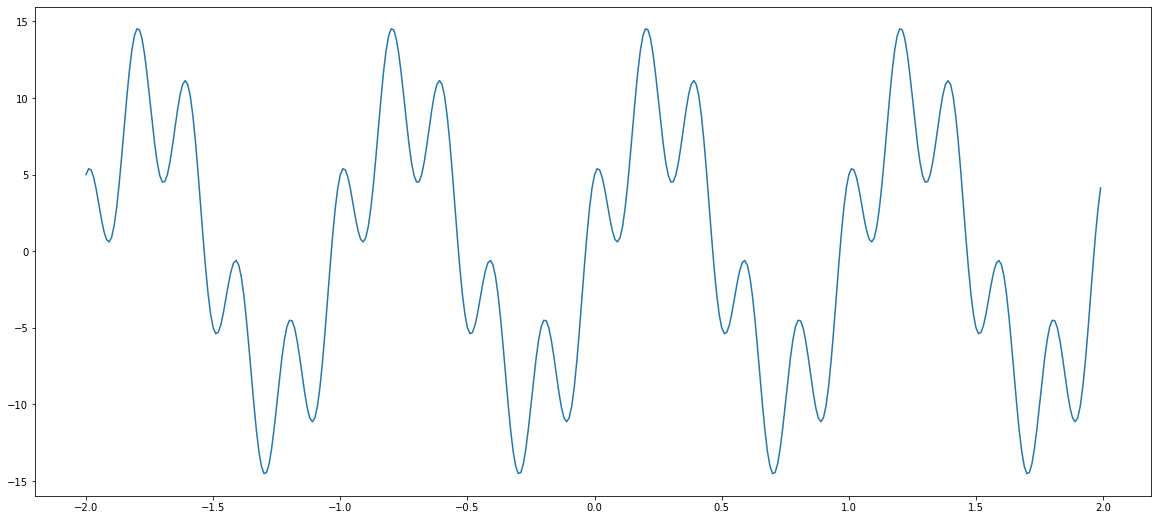

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
axs.plot(x, y)

In [14]:
os.makedirs('3D', exist_ok=True)

dY = dftm * Y
for i in range(dY.shape[0]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), subplot_kw={'projection':'3d'})
    ax.plot(x, np.real(dY[i+0]), np.imag(dY[i+0]), '-')
    ax.plot([x[0], x[-1]], [0, 0], [0, 0], '-r')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.set_ylim([-np.abs(y).max(), np.abs(y).max()])
    ax.set_zlim([-np.abs(y).max(), np.abs(y).max()])
    if i % slower == 0:
        for j in range(5):
            plt.savefig('3D/{:05d}_{}.png'.format(i, j), bbox_inches='tight')
    else:
        plt.savefig('3D/{:05d}.png'.format(i),  bbox_inches='tight')
    plt.close()

In [15]:
import cv2

image_folder = '3D'
video_name = '3D/video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 30, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [16]:
for ig in images:
    os.remove(os.path.join(image_folder, ig))